<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Изучаем данные сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В процессе работы будем работать над задачей определения рыночной стоимости объектов недвижимости и установлением параметров для постройки автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла
Открываем файл с данными и изучаем предоставленную информацию.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Предобработка данных

Проверяем пропущенные значения

In [4]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце "апартаменты" подозрительно много пропущенных значений. Считаем отдельно значения присутствующие.

In [5]:
data.groupby('is_apartment').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
is_apartment,,,,,,,,,,,,,,,,,,,,,
False,2725,2725,2725,2725,2725,1818,2725,2613,2725,2725,...,2550,2267,2710,2103,2104,2104,928,2104,1046,2462
True,50,50,50,50,50,44,50,42,50,50,...,35,31,50,41,43,43,19,43,30,38


Их 2775(из которых True - 50, False - 2725). Предполагаем, что данные пустые значения также не стоит как-либо видоизменять, так как нельзя знать наверняка, относятся ли эти помещения к жилому фонду или нет. 

Почти в 40% случаев не указана высота потолков. Можем предположить, что она в данных квартирах не была измерена. Ни среднее значение, ни замена на 0 тут не подойдёт. Оставляем пропущенные значения по этому параметру без изменений.

86 пропусков по параметру количества этажей в доме. Мы также не можем знать наверняка эти данные и предполагать или усреднять. Оставляем без изменений.

Аналогичная ситуация с площадью квартир (1903 пропущенных значения).

Названия населённых пунктов также нельзя угадать или усреднить. Пропуски оставляем без изменений.

Пропущенные значения в столбце с информацией о балконах могли появиться по причине того, что балконов попросту в квартирах нет. Всвязи с этим заменяем данные пропущенные значения на 0.

Заменяем пропущенные значения на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски в столбце с информацией о ближайших аэропортах: для начала ликвидируем пропущенные значения 
в тех случаях, когда данные не указаны случайно. Подойдёт среднее арифметическое для отдельно взятого 
населённого пункта.

In [7]:
data_transformed = data.groupby('locality_name')['airports_nearest'].transform('mean')
data['airports_nearest'] = data['airports_nearest'].fillna(data_transformed)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проверяем снова. Пропущенных значений стало несильно меньше.

In [8]:
data['airports_nearest'].isnull().sum()

5394

Просматриваем, в каких случаях значения не указаны.

In [9]:
data.groupby('locality_name')['airports_nearest'].count().head(20)

locality_name
Бокситогорск       0
Волосово           0
Волхов             0
Всеволожск         0
Выборг             0
Высоцк             0
Гатчина            0
Зеленогорск       24
Ивангород          0
Каменногорск       0
Кингисепп          0
Кириши             0
Кировск            0
Колпино          338
Коммунар           0
Красное Село     178
Кронштадт         96
Кудрово            0
Лодейное Поле      0
Ломоносов        133
Name: airports_nearest, dtype: int64

В своём большинстве это те места, которые находятся слишком
далеко от аэропортов. 
Заменять значения на 0 будет нелогично: это будет обозначать, что
аэропорт находится совсем рядом. Всвязи с чем делаем вывод, что данные пропуски стоит оставить без изменений.

Просматриваем значения в столбце с информацией о расстоянии до центра города. Предварительно можем
сделать вывод, что данные населённые пункты находятся слишком далеко от центра Санкт-Петербурга. Оставляем значения неизменными.

In [10]:
data.groupby('locality_name')['cityCenters_nearest'].count().head(20)

locality_name
Бокситогорск       0
Волосово           0
Волхов             0
Всеволожск         0
Выборг             0
Высоцк             0
Гатчина            0
Зеленогорск       24
Ивангород          0
Каменногорск       0
Кингисепп          0
Кириши             0
Кировск            0
Колпино          337
Коммунар           0
Красное Село     176
Кронштадт         95
Кудрово            0
Лодейное Поле      0
Ломоносов        132
Name: cityCenters_nearest, dtype: int64

В пропусках касаемо площади кухонь заменяем отсутствующие значения на 0 в случае, если
планировка свободная. В остальном оставялем без изменений.

In [11]:
data.loc[data['open_plan'], 'kitchen_area'] = data.loc[data['open_plan'],'kitchen_area'].fillna(0)

В столбце с информацией о количестве дней размещения объявления пропусков сравнительно мало. 
Предположим, что объявления были только опубликованы, и не прошло ещё даже дня. Из этих
соображений заполняем пропущенные значения нулями.

In [12]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В значениях высоты потолков заполняем пропуски наиболее распространённым значением

In [13]:
print('Медиана высоты потолков:', data['ceiling_height'].median())
print('Средняя высота потолков:',data['ceiling_height'].mean())

Медиана высоты потолков: 2.65
Средняя высота потолков: 2.77149889685604


In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.6)
data.head()
     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Производим логичную замену типов данных в столбцах, где это уместно.


In [15]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['days_exposition'] = data['days_exposition'].astype(int)
data['last_price'] = data['last_price'].astype(int)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Изучаем названия населённых пунктов

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Для дальнейшего удобства работы приводим все названия к нижнему регистру и заменяем "Ё" на "Е"

In [17]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Также избавляемся от лишних слов, которые не потребуются при анализе

In [18]:
data['locality_name'] = data['locality_name'].str.replace('поселок','')
data['locality_name'] = data['locality_name'].str.replace('деревня','')

## Расчёты и добавление результатов в таблицу

Считаем и добавляем в таблицу цену за квадратный метр и соотношения площадей 
(общей к жилой и общей к площади к кухни)

In [19]:
data['price_for_meter'] = data['last_price']/data['total_area']
data['area_ratio'] = data['living_area']/data['total_area']
data['kitchen_ratio'] = data['kitchen_area']/data['total_area']

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,area_ratio,kitchen_ratio
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,True,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.370370,0.472222,0.231481
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,True,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,0.460396,0.272277
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.30,4,True,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,0.612500,0.148214
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,True,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,NaN,NaN
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,True,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,0.320000,0.410000
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.789474,0.473684,0.299342
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,True,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195.710456,0.284182,0.386059
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.60,24.0,NaN,22,True,...,23982.0,11634.0,0.0,NaN,0.0,NaN,0,110544.692737,NaN,0.263966
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,True,...,NaN,NaN,NaN,NaN,NaN,NaN,189,87454.764777,0.465320,0.265682
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,True,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524.590164,0.714754,0.106557


Добавляем столбцы с днём недели, месяцем и годом публикации объявлений

In [20]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['weekday_exposition']=data['first_day_exposition'].dt.weekday
data['month_exposition']=data['first_day_exposition'].dt.month
data['year_exposition']=data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,area_ratio,kitchen_ratio,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,0,120370.370370,0.472222,0.231481,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,True,...,NaN,0.0,NaN,81,82920.792079,0.460396,0.272277,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,True,...,90.0,2.0,574.0,558,92785.714286,0.612500,0.148214,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,NaN,9,True,...,84.0,3.0,234.0,424,408176.100629,NaN,NaN,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121,100000.000000,0.320000,0.410000,1,6,2018


Создаём столбец с идентификацией этажа: первый, последний, другой

In [21]:
def floor(row):
    floor = row['floor']
    floor_max = row['floors_total']
    if floor ==1:
        return 'первый'
    elif floor == floor_max:
        return 'последний'
    else: 
        return 'другой'
data['floor_new'] = data.apply(floor, axis=1)
    
data.head()
    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,area_ratio,kitchen_ratio,weekday_exposition,month_exposition,year_exposition,floor_new
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,0,120370.370370,0.472222,0.231481,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,True,...,0.0,NaN,81,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,True,...,2.0,574.0,558,92785.714286,0.612500,0.148214,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,NaN,9,True,...,3.0,234.0,424,408176.100629,NaN,NaN,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121,100000.000000,0.320000,0.410000,1,6,2018,другой


## Исследовательский анализ данных

Изучаем площадь квартир. Строим гистограмму. Пик наблюдается в области 30-50 квадратных метров. Учитывая, что жилая недвижимость сейчас стоит довольно дорого, такой размер квартир оптимален для покупки собственного жилья. 

<AxesSubplot:>

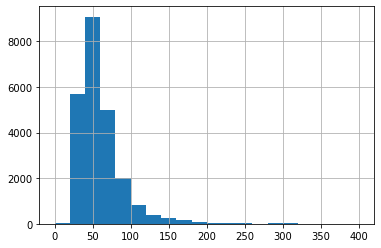

In [22]:
data['total_area'].hist(bins = 20, range = (0,400))

Изучаем цену на момент снятия с публикации. Строим гистограмму. Пик наблюдается в области 4-5млн рублей. Полагаем, что это является оптимальной ценой для квартир, имеющих площадь 30-50 квадратных метров, которые преобладали в данных, судя по предудыщей гистограмме.

<AxesSubplot:>

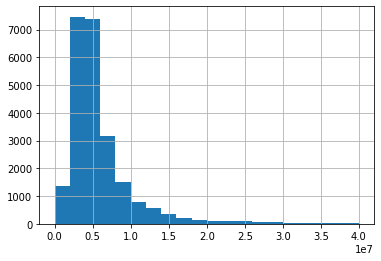

In [23]:
data['last_price'].hist(bins=20, range = (0, 40000000))

Изучаем количество комнат в квартирах. Строим гистограмму. По ней наблюдаем, что в данных преобладают однокомнатные и двухкомнатные квартиры, чуть меньше квартир с тремя комнатами, квартиры с бОльшим количеством комнат присутствуют, но в ощутимо меньшем количестве. 
В случае, если площадь меньше 40 кв метров, а количество комнат равно нулю, заменяю данные значения на 1.

In [24]:
data.loc[(data['rooms'] == 0) & (data['total_area'] < 40), 'rooms'] = 1

<AxesSubplot:>

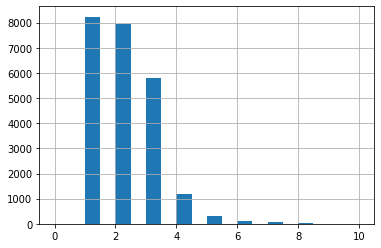

In [25]:
data['rooms'].hist(bins=20, range = (0,10))

Изучаем высоту потолков в квартирах. Преобладающим значением является 2,5 метра. Это норма для российских квартир, потолки около 3 и более метров характерны для элиного жилья. 

<AxesSubplot:>

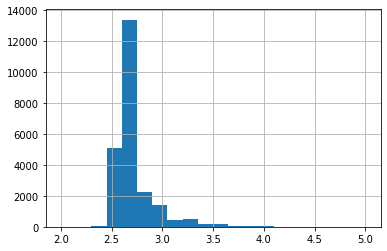

In [26]:
data['ceiling_height'].hist(bins=20, range=(2,5))

Изучаем время продажи квартир. Строим гистограмму. 

<AxesSubplot:>

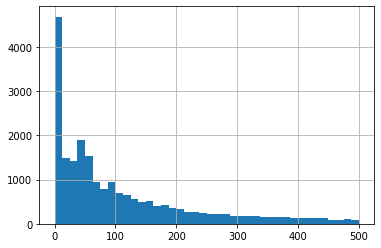

In [27]:
data['days_exposition'].hist(bins=40, range = (0,500))

По гистограмме заметно, что пик приходится на нулевое значение: это выбивающееся нетипичное значение, ведь, объективно говоря, невозможно продать квартиру в день выставления на продажу. Предполагаем, что по данной составляющей не было информации, и отсутствующие значения заменили нулями. Заменяем нулевые значения на отсутствующие.

In [28]:
data['days_exposition']=data['days_exposition'].replace(0, np.nan)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,area_ratio,kitchen_ratio,weekday_exposition,month_exposition,year_exposition,floor_new
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,True,...,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,True,...,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,NaN,9,True,...,3.0,234.0,424.0,408176.100629,NaN,NaN,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,другой


Вычисляем медиану срока продажи, нулевые значения заменяем на неё

In [29]:
data['days_exposition'].median()

95.0

In [30]:
data['days_exposition'] = data['days_exposition'].fillna(74)
data['days_exposition'] = data['days_exposition'].astype(int)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,area_ratio,kitchen_ratio,weekday_exposition,month_exposition,year_exposition,floor_new
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,74,120370.370370,0.472222,0.231481,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,True,...,0.0,NaN,81,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,True,...,2.0,574.0,558,92785.714286,0.612500,0.148214,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,NaN,9,True,...,3.0,234.0,424,408176.100629,NaN,NaN,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121,100000.000000,0.320000,0.410000,1,6,2018,другой


Проверяем на гистограмме статистику после замены нулей. Пик приходится на примерно 45-60 дней. Это средний срок продажи квартир с одной или двумя комнатами в нашей стране. Если быть точнее, около 2 месяцев.
Продажи, прошедшие быстрее этого срока являются необычно быстрыми, а необычно долгими являются те, что проходили более 1 года. В данных присутствуют значения, которые обозначают то, что продажи проходили около 4 лет. Это очень долго. Но таких значений немного, и, судя по графику, они не выбиваются из общего числа, так как линия плавно идёт вниз. Оставляем их без зменений.

<AxesSubplot:>

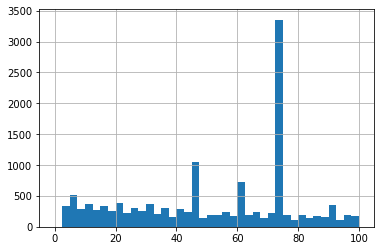

In [31]:
data['days_exposition'].hist(bins=40, range = (0,100))

<AxesSubplot:>

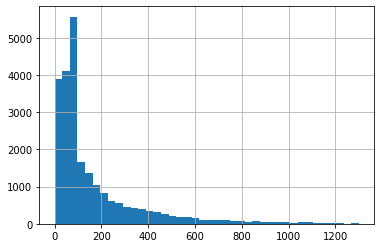

In [32]:
data['days_exposition'].hist(bins=40, range = (0,1300))

Изучаем зависимость цены квартиры от её площади. На графике видно, что эта зависимость присутствует: квартиры с меньшей площадью стоят дешевле.

<AxesSubplot:xlabel='living_area'>

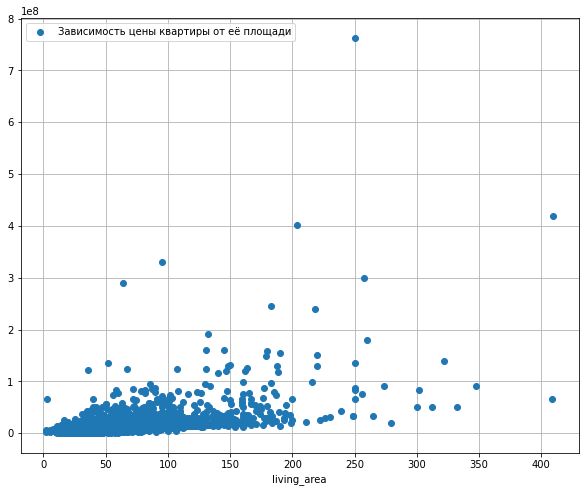

In [33]:
data.plot(x='living_area', y ='last_price',  style = 'o', figsize = (10, 8), sharex=False, grid=True, label = 'Зависимость цены квартиры от её площади')

Проверяем с помощью корреляции: она больше нуля, соответственно, от увеличения площади зависит увеличение стоимости.

In [34]:
data['last_price'].corr(data['living_area'])

0.5664915336952653

Изучаем зависимость стоимости квартир от количества комнат. Она присутствует до отметки в 5 комнат, после идёт странная статистика по уменьшению цены. Либо данные квартиры находятся далеко от центра и в принципе от города, либо данные некорректны. 

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

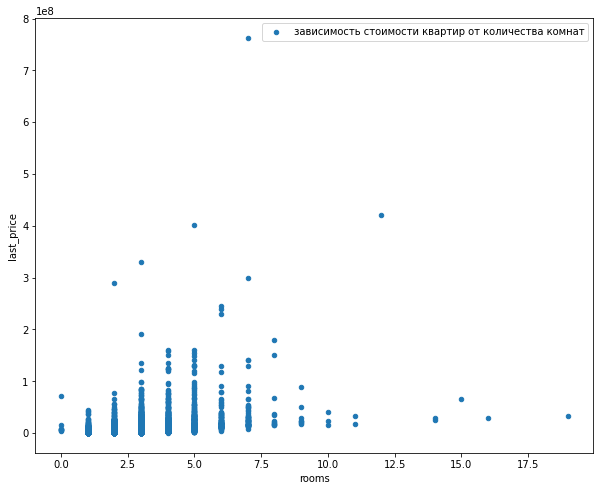

In [35]:
data.plot( x='rooms', y='last_price', figsize = (10, 8), kind = 'scatter', label = 'зависимость стоимости квартир от количества комнат')

Изучаем зависимость стоимости квартир от близости к центру города. На графике она чётко прослеживается: чем квартиры ближе к центру, тем они дороже.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

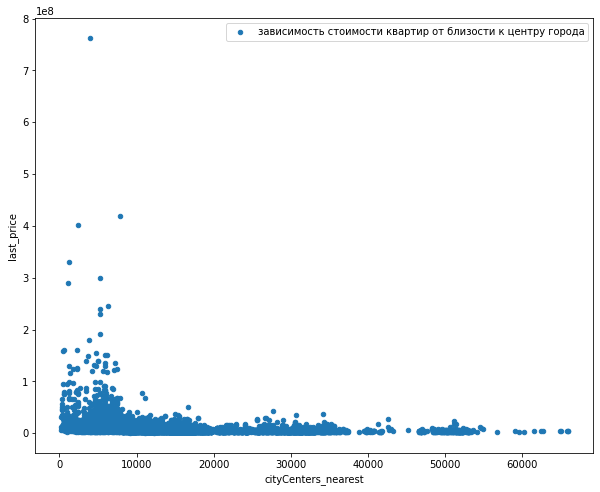

In [36]:
data.plot(x='cityCenters_nearest', y='last_price', figsize = (10, 8), kind = 'scatter', label = 'зависимость стоимости квартир от близости к центру города')

Коэффициент корреляции отрицательный: это значит, что, чем меньше расстояние от центра, тем выше цена.

In [37]:
data['last_price'].corr(data['cityCenters_nearest'])

-0.20674734874298387

Проверяем зависимость стоимости квартир от дня, месяца и года их продажи. Она практически не наблюдается. Коэффициент корреляции близится к нулю.

<AxesSubplot:xlabel='weekday_exposition'>

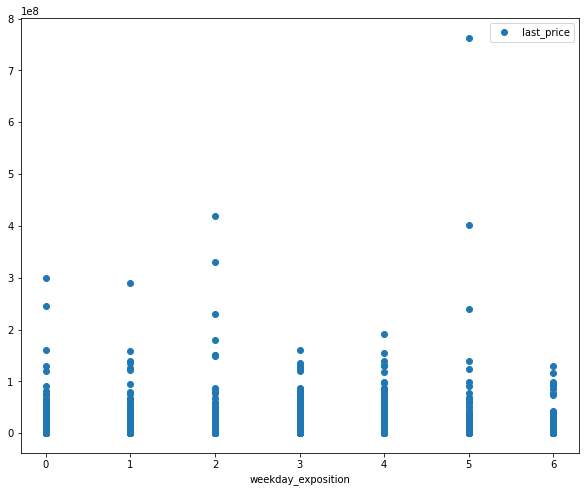

In [38]:
data.plot(x='weekday_exposition', y='last_price', figsize = (10, 8), style = 'o')

In [39]:
data['last_price'].corr(data['weekday_exposition'])

0.0015501452176215407

<AxesSubplot:xlabel='month_exposition'>

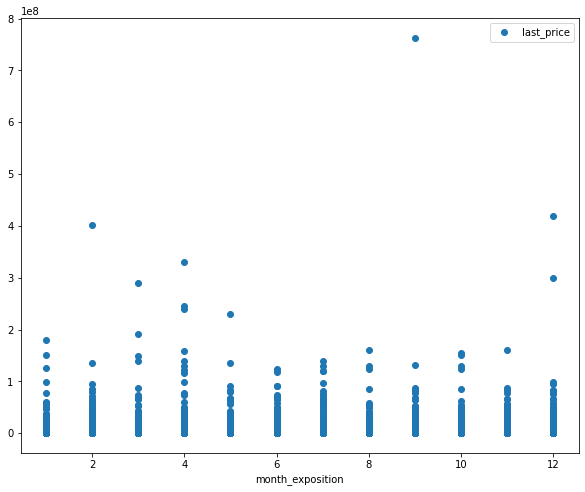

In [40]:
data.plot(x='month_exposition',figsize = (10, 8), y='last_price', style = 'o')

In [41]:
data['last_price'].corr(data['month_exposition'])

0.002779128750739717

<AxesSubplot:xlabel='year_exposition'>

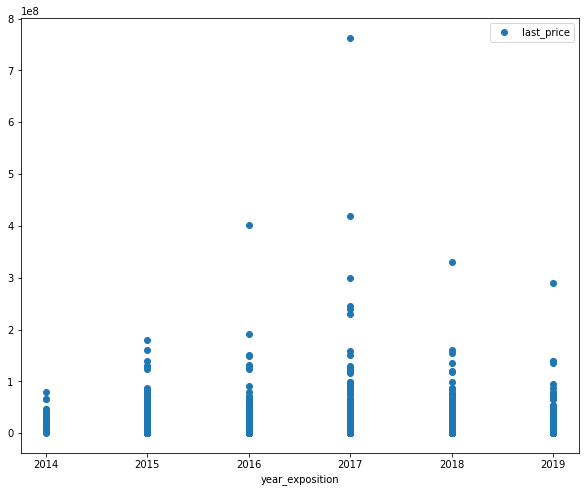

In [42]:
data.plot(x='year_exposition', y='last_price', figsize = (10, 8), style = 'o')

In [43]:
data['last_price'].corr(data['year_exposition'])

-0.04308903619950847

Наглядно просмотрим данные по корреляции на матрице корреляции

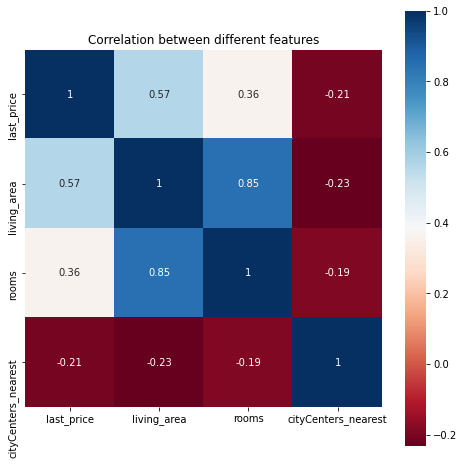

In [44]:
cor_columns = ['last_price', 'living_area', 'rooms','cityCenters_nearest']
correlation = data[cor_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdBu')

plt.title('Correlation between different features')
plt.show()

С помощью сводной таблицы просматриваем медианные показатели цен относительно этажей: первого, последнего или любого другого. Можно заметить, что квартиры, расположенные на первом этаже, стоят дешевле. Квартиры на последнем этаже находятся стоят чуть дороже, но самая высокая стоимость у квартир на других этажах. Предполагаем, что это самые удобные варианты размещения, что и влечёт за собой более высокую цену.

In [45]:
data_pivot = data.pivot_table(index = 'floor_new', values = 'last_price', aggfunc = 'median')
data_pivot

,last_price
floor_new,
другой,4850000
первый,3900000
последний,4300000


Выбираем 10 населённых пунктов с наибольшим количеством объявлений.

In [46]:
data['locality_name'].value_counts().head(10)

санкт-петербург    15721
 мурино              556
 шушары              440
всеволожск           398
пушкин               369
колпино              338
 парголово           327
гатчина              307
 кудрово             299
выборг               237
Name: locality_name, dtype: int64

Cчитаем среднюю цену за квадратный метр в этих населённых пунктах.


In [47]:
data_grouped = data.pivot_table(index='locality_name', values = 'price_for_meter', aggfunc = 'median')
data_grouped.head()


,price_for_meter
locality_name,
агалатово,73665.700401
александровская,70262.807084
алексеевка,22222.222222
аннино,64103.084416
аро,50853.242321


Просматриваем среднюю цену за квадратный метр в интересующих нас населённых пунктах. Делаем вывод, что самая дорогая стоимость в Санкт-Петербурге и Пушкине, а самая низкая в Выборге.

In [48]:
data_grouped.query('("санкт-петербург", "мурино", "шушары", "всеволожск", "пушкин", "колпино", "парголово", "гатчина", "кудрово", "выборг") in locality_name')

,price_for_meter
locality_name,
всеволожск,65789.473684
выборг,58158.319871
гатчина,67796.610169
колпино,74723.748474
кудрово,100000.000000
мурино,91478.394974
пушкин,100000.000000
санкт-петербург,104761.904762


Выделяем срез данных по Санкт-Петербургу.
Округляем расстояние до центра до целых чисел в километрах.

In [49]:
data_center = data.query('locality_name == "санкт-петербург"')
data_center['cityCenters_nearest'] = round(data_center['cityCenters_nearest']/1000, 0)
data_center['cityCenters_nearest']

0        16.0
2        14.0
3         7.0
4         8.0
7        12.0
         ... 
23689    16.0
23690     6.0
23691     4.0
23694     4.0
23697    10.0
Name: cityCenters_nearest, Length: 15721, dtype: float64

С помощью сводной таблицы просматриваем среднюю цену в зависимости от удалённости от центра

In [50]:
data_grouped_center = data_center.pivot_table(index='cityCenters_nearest', values = 'last_price', aggfunc = 'median')
data_grouped_center

,last_price
cityCenters_nearest,
0.0,17900000
1.0,11395000
2.0,10000000
3.0,8409000
4.0,9200000
5.0,9500000
6.0,8900000
7.0,7800000
8.0,7450000


Строим график. График силльно меняется в области 3-5км. Будем считать, что 5км удалённости от центра - зона центральная.

<AxesSubplot:xlabel='cityCenters_nearest'>

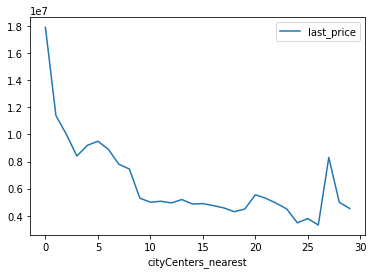

In [51]:
data_grouped_center.plot()

Изучим сегмент квартир в центре. Сравним их со всем городом. 

In [52]:
data_center_SP = data_center.query('cityCenters_nearest <= 5.0')
data_center_SP.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,area_ratio,kitchen_ratio,weekday_exposition,month_exposition,year_exposition,floor_new
24,8,6500000,97.2,2015-10-31,2,2.60,3.0,46.50,1,True,...,3.0,124.0,265,66872.427984,0.478395,0.201646,5,10,2015,первый
35,6,15500000,149.0,2017-06-26,5,2.60,5.0,104.00,4,True,...,1.0,779.0,644,104026.845638,0.697987,0.114094,0,6,2017,другой
61,18,7990000,74.0,2017-08-24,2,2.60,4.0,43.00,4,True,...,0.0,NaN,609,107972.972973,0.581081,0.270270,3,8,2017,последний
63,2,20000000,118.0,2018-09-11,3,3.00,9.0,68.00,7,True,...,1.0,779.0,37,169491.525424,0.576271,0.135593,1,9,2018,другой
99,32,9600000,90.0,2017-09-26,4,2.60,5.0,67.00,2,True,...,0.0,NaN,104,106666.666667,0.744444,0.088889,1,9,2017,другой
121,20,33000000,180.0,2017-02-17,3,2.90,9.0,86.00,8,False,...,0.0,NaN,144,183333.333333,0.477778,0.133333,4,2,2017,другой
136,16,6500000,51.8,2018-08-01,2,3.45,6.0,25.60,2,True,...,1.0,812.0,163,125482.625483,0.494208,0.140927,2,8,2018,другой
137,11,13310800,85.1,2018-01-01,2,2.70,10.0,31.52,5,True,...,3.0,133.0,340,156413.631022,0.370388,0.315511,0,1,2018,другой
138,8,4800000,40.0,2017-11-18,2,2.60,3.0,29.00,2,True,...,2.0,729.0,80,120000.000000,0.725000,0.150000,5,11,2017,другой
141,8,6500000,32.6,2019-02-27,1,2.60,5.0,18.50,5,True,...,0.0,NaN,74,199386.503067,0.567485,0.168712,2,2,2019,последний


Логично, что их чётко меньше. но пик приходится в обоих случаях почти на одну и ту же величину по площади. Но всё же можно заметить, что в центре преобладают квартиры с бОльшей площадью: около 60-70 квадратных метров.

<AxesSubplot:ylabel='Frequency'>

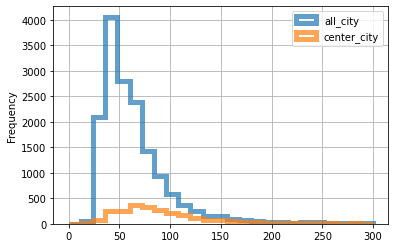

In [53]:
ax = data_center.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 300),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='all_city',
)
data_center_SP.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 300),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='center_city',
    ax=ax,
    grid=True,
    legend=True
) 


Также обращаем внимание, что средняя цена квартир в центре выше, чем по всему городу.

<AxesSubplot:ylabel='Frequency'>

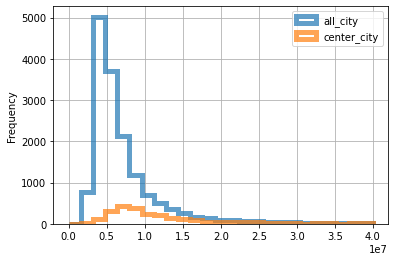

In [54]:
ax = data_center.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    range=(0, 40000000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='all_city',
)
data_center_SP.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    range=(0, 40000000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='center_city',
    ax=ax,
    grid=True,
    legend=True,
) 



В центре, в отличие от остального города, немного преобладают квартиры с 3 комнатами.

<AxesSubplot:ylabel='Frequency'>

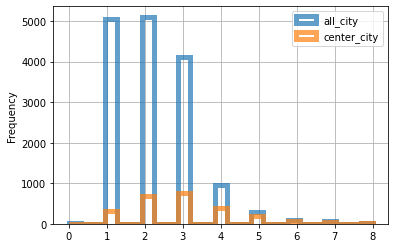

In [55]:
ax = data_center.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    range=(0, 8),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='all_city',
)
data_center_SP.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    range=(0, 8),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='center_city',
    ax=ax,
    grid=True,
    legend=True,
) 



Потолки в центре города также сравнительно выше. Пик приходится на 3 и более метра, когда по всему городу эта величина - 2,5-3.

<AxesSubplot:ylabel='Frequency'>

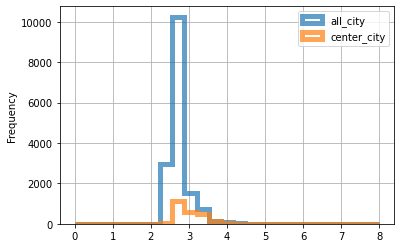

In [56]:
ax = data_center.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(0, 8),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='all_city',
)
data_center_SP.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(0, 8),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='center_city',
    ax=ax,
    grid=True,
    legend=True,
) 




Cравниваем коэффициенты корреляции Пирсона между ценой и числом комнат по всему городу и в центре. Разница почти отсутствует. Но всё же коэффициент в центре чуть ниже, что может быть обусловлено повышенными ценами на жилую площадь в центре города.

In [57]:
data_center['last_price'].corr(data_center['rooms'])

0.37337833583949553

In [58]:
data_center_SP['last_price'].corr(data_center_SP['rooms'])

0.2822030917172726

Cравниваем коэффициенты корреляции Пирсона между ценой и этажом по всему городу и в центре.
Коэффициент чётко выше для квартир в центре. Причина та же - цены на квартиры в центре выше.

In [59]:
data_center['last_price'].corr(data_center['floor'])

-0.0008379427208810868

In [60]:
data_center_SP['last_price'].corr(data_center_SP['floor'])

0.12707787777152338

Cравниваем коэффициенты корреляции Пирсона между ценой и расстоянием от центра.
Отрицательные коэффициенты демонстрируют, что, чем ближе к центру, тем квартиры дороже.

In [61]:
data_center['last_price'].corr(data_center['cityCenters_nearest'])

-0.259398760793082

In [62]:
data_center_SP['last_price'].corr(data_center_SP['cityCenters_nearest'])

-0.07281893542515713

Cравниваем коэффициенты корреляции Пирсона между ценой и годом размещения публикации. Коэффициенты близятся к нулю, и можно предположить, что дата публикации объявления несильно повлияла на цену. Но всё же в центре города наблюдается меньшая зависимость: 


In [63]:
data_center['last_price'].corr(data_center['year_exposition'])

-0.04459056964885362

In [64]:
data_center_SP['last_price'].corr(data_center_SP['year_exposition'])

-0.01751917715417792

Cравниваем зависимость цены от года размещения публикации. По всему городу наблюдается спад цен после 2014 года. 

In [65]:
data_SP_new = data_center.pivot_table(index='year_exposition', values = 'last_price', aggfunc = 'median')
data_SP_new

,last_price
year_exposition,
2014,10600000
2015,6200000
2016,5450000
2017,5300000
2018,5490000
2019,5900000


В центре также пик цен приходится на 2014 год, а в последующие года ценовая отметка держится примерно на одном уровне.

In [66]:
data_center_new = data_center_SP.pivot_table(index='year_exposition', values = 'last_price', aggfunc = 'median')
data_center_new

,last_price
year_exposition,
2014,18400000
2015,10500000
2016,9350000
2017,9150000
2018,9300000
2019,10450000


<AxesSubplot:ylabel='Frequency'>

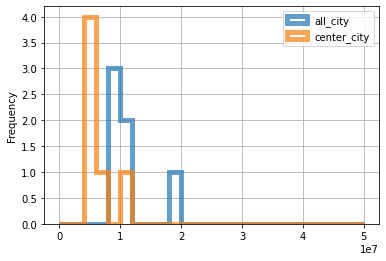

In [67]:
ax = data_center_new.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    range=(0, 50000000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='all_city',
)
data_SP_new.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    range=(0, 50000000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='center_city',
    ax=ax,
    grid=True,
    legend=True,
) 





## Общий вывод

1. Данные изучены. В предоставленных данных большое количество пропусков: часть из них могла быть утеряна при переносе из одного источника в другой, а часть могла просто отсутствовать.

2. Изучены параметры квартир: площадь, цена, число комнат, высота потолков. Распределения данных близки к распределению Пуассона.

3. Аномальные данные выявлены, по возможности исправлены.

4. Изучено время продажи квартир. Распределение близко к распределению Пуассона. Аномальных пиков в гистограмме не выявлено. В основном квартиры продаются около 45-60 дней. Время продажи меньше 4 дней и больше 512 дней можно считать выбросами.

5. Проанализированы факторы, влияющие на стоимость квартиры. Наибольшую корреляцию показали: общая площадь и  удалённость от центра города. Также выявлена зависимость цены от года размещения объявления. На это могли повлиять изменения на рынке недвижимости.

6. Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург, а самым дешёвым - Выборг.

7. Проанализирована зависимость цены за квадратный метр от расстояния до центра города в Санкт-Петербурге. Граница центрального района около 5 км.

8. Рассмотрены факторы, влияющие на стоимость квартиры в Санкт-Петербурге и его центре. Квартиры чётко дороже в центральном районе. В остальном корреляции не сильно отличаются. 